In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [128]:
# Load the data and check the first few lines
dataset_path = "preprocessed_data_with_num.csv" # use your own path

dataset = pd.read_csv(dataset_path)
dataset.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing requirements,missing benefits,title_length,location_length,department_length,company_profile_length,description_length,requirements_length,full_text_length,missing_combination,missing_combination_Both profile and logo Missing,missing_combination_Both profile and logo Present,missing_combination_Missing Logo Only,missing_combination_Missing Profile Only
0,marketing intern,usa ny new york,marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,NaN,0,1,0,2,4,9,NaN,marketing,0,0,0,0,0,0,1,16,17,9,888,908,862,2700,Both profile and logo Present,0,1,0,0
1,customer service cloud video production,nz auckland,success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,marketing advertising,customer service,0,0,0,0,0,0,0,41,14,7,1289,2072,1439,4862,Both profile and logo Present,0,1,0,0
2,commissioning machinery assistant cma,usa ia wever,NaN,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,NaN,0,1,0,2,6,9,NaN,NaN,0,0,0,1,0,0,1,39,14,0,875,355,1377,2660,Both profile and logo Present,0,1,0,0
3,account executive washington dc,usa dc washington,sale,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,computer software,sale,0,0,0,0,0,0,0,33,19,5,613,2617,1444,4731,Both profile and logo Present,0,1,0,0
4,bill review manager,usa fl fort worth,NaN,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,hospital health care,health care provider,0,0,0,1,0,0,0,19,19,0,1632,1445,769,3884,Both profile and logo Present,0,1,0,0


In [129]:
# drop duplicates
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [130]:
dataset.fillna('', inplace=True)

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x = dataset.drop(['fraudulent', 'in_balanced_dataset' ] , axis = 1)
y = dataset['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 0)


In [133]:
train_set = x_train.copy()
train_set = train_set.drop(columns= ['missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only', 'full_text_length'])
train_set['fraudulent'] = y_train

                         telecommuting  has_company_logo  has_questions  \
telecommuting                 1.000000         -0.016534       0.009895   
has_company_logo             -0.016534          1.000000       0.226283   
has_questions                 0.009895          0.226283       1.000000   
employment_type              -0.016554         -0.040944      -0.033882   
required_experience          -0.020898         -0.139666      -0.038680   
required_education            0.020233         -0.167008      -0.110666   
missing location              0.019995          0.018949       0.005640   
missing department           -0.015016         -0.119827      -0.137355   
missing company profile       0.061984         -0.701557      -0.144778   
missing requirements         -0.026742         -0.260129      -0.218443   
missing benefits             -0.046987         -0.190914      -0.276186   
title_length                  0.013187          0.001385       0.001290   
location_length          

<AxesSubplot:>

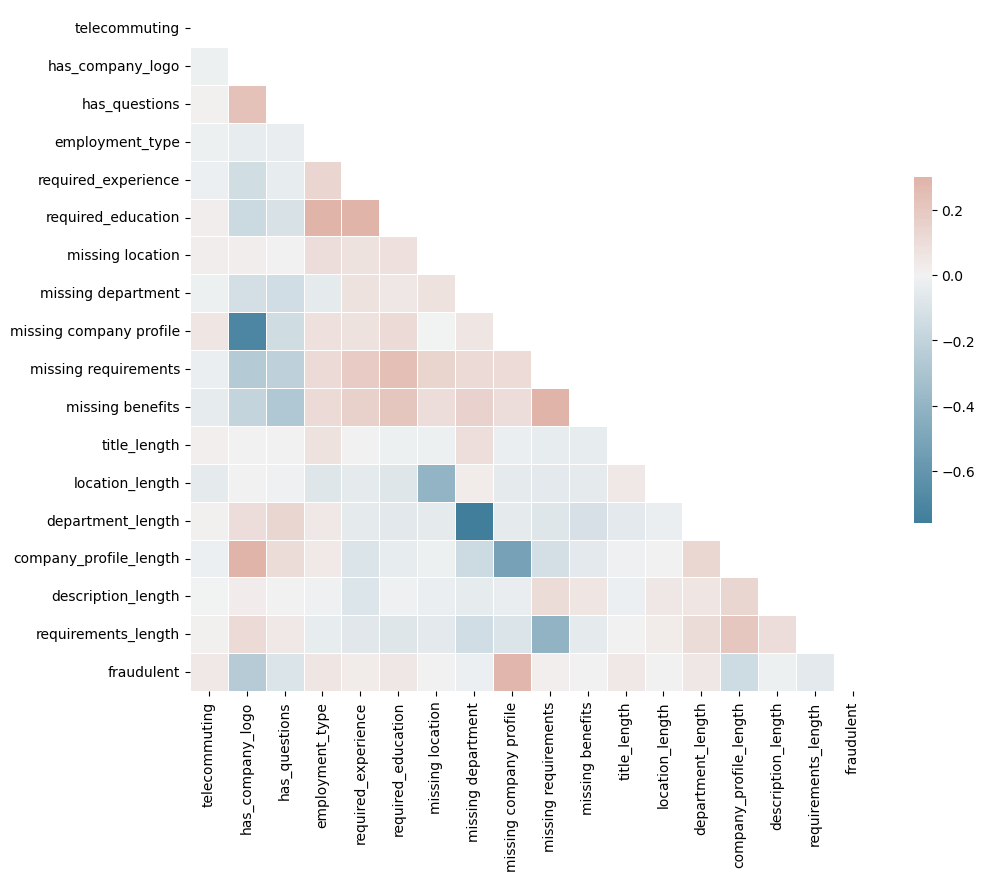

In [134]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
corr['fraudulent']

telecommuting              0.040077
has_company_logo          -0.253788
has_questions             -0.090460
employment_type            0.051729
required_experience        0.034635
required_education         0.047503
missing location           0.001651
missing department        -0.022661
missing company profile    0.280380
missing requirements       0.016089
missing benefits          -0.000775
title_length               0.043280
location_length            0.001144
department_length          0.049310
company_profile_length    -0.154782
description_length        -0.015832
requirements_length       -0.056285
fraudulent                 1.000000
Name: fraudulent, dtype: float64

In [136]:
num_features = x_train.loc[:, ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing location', 'missing department',  'missing requirements','missing benefits',  'title_length', 'location_length', 'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.89098194e+01, 1.62630880e+02, 5.07669022e+01, 1.40183292e+01,
       1.68014816e+01, 6.32431901e+01, 7.85502091e+02, 3.28412360e-02,
       2.24773495e+00, 2.70221990e+00, 4.40272189e-03, 1.54857545e+02,
       2.96572343e-02, 3.52306485e+02, 1.53742719e+05, 1.91924303e+03,
       2.49193300e+04]), array([1.37045443e-005, 3.01204294e-037, 1.04012980e-012, 1.81037274e-004,
       4.15008877e-005, 1.82698194e-015, 7.65955282e-173, 8.56193711e-001,
       1.33810138e-001, 1.00208631e-001, 9.47096781e-001, 1.50426636e-035,
       8.63270268e-001, 1.33313606e-078, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))
missing benefits            9.470968e-01
location_length             8.632703e-01
missing location            8.561937e-01
missing department          1.338101e-01
missing requirements        1.002086e-01
employment_type             1.810373e-04
required_experience         4.150089e-05
telecommuting               1.370454e-05
has_questions               1.040130

<AxesSubplot:>

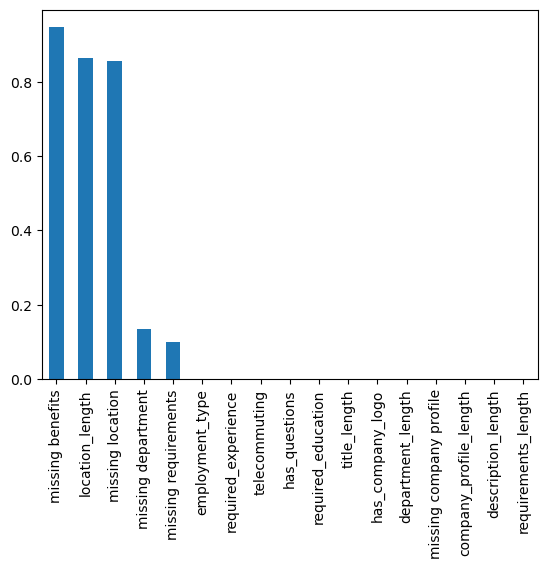

In [137]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


telecommuting              0.000620
has_company_logo           0.025085
has_questions              0.003306
employment_type            0.005107
required_experience        0.003656
required_education         0.006455
missing company profile    0.031869
missing location           0.000000
missing department         0.006551
missing requirements       0.000000
missing benefits           0.001353
title_length               0.008751
location_length            0.008182
department_length          0.007497
company_profile_length     0.085543
description_length         0.038666
requirements_length        0.034781
dtype: float64

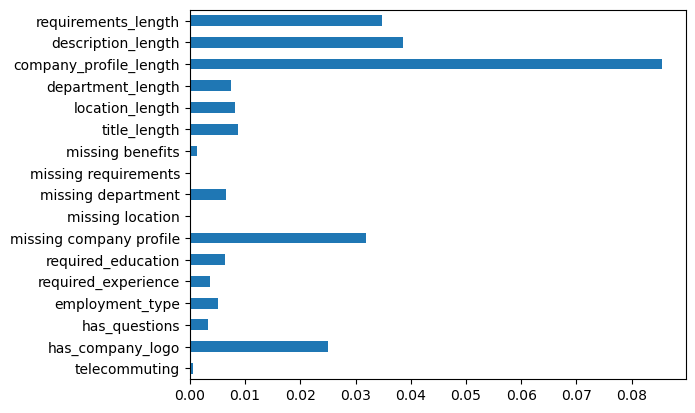

In [138]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

we have decided to drop all the new features that represent the missing values and the feature 'location length', with the exception of 'missing company profile', as the p-value of chi-square test for these columns are above 0.05. 

In addition, since the feature 'missing company profile' has a correlation with 'has_company_logo' of -0.70, we decided to combine these two features, as: 1. they both represent company-related information in the dataset 2. to reduce dimensionality and multicollinearity in models.

In [139]:
train_set = x_train.copy()
train_set = train_set.drop(columns= ['missing company profile',
       'missing location', 'missing department',  'missing requirements','missing benefits', 'full_text_length', 'location_length',
       'has_company_logo'])
train_set['fraudulent'] = y_train

                                                   telecommuting  \
telecommuting                                           1.000000   
has_questions                                           0.009895   
employment_type                                        -0.016554   
required_experience                                    -0.020898   
required_education                                      0.020233   
title_length                                            0.013187   
department_length                                       0.007176   
company_profile_length                                 -0.019537   
description_length                                     -0.006325   
requirements_length                                     0.007535   
missing_combination_Both profile and logo Missing       0.038210   
missing_combination_Both profile and logo Present      -0.040148   
missing_combination_Missing Logo Only                  -0.029867   
missing_combination_Missing Profile Only        

<AxesSubplot:>

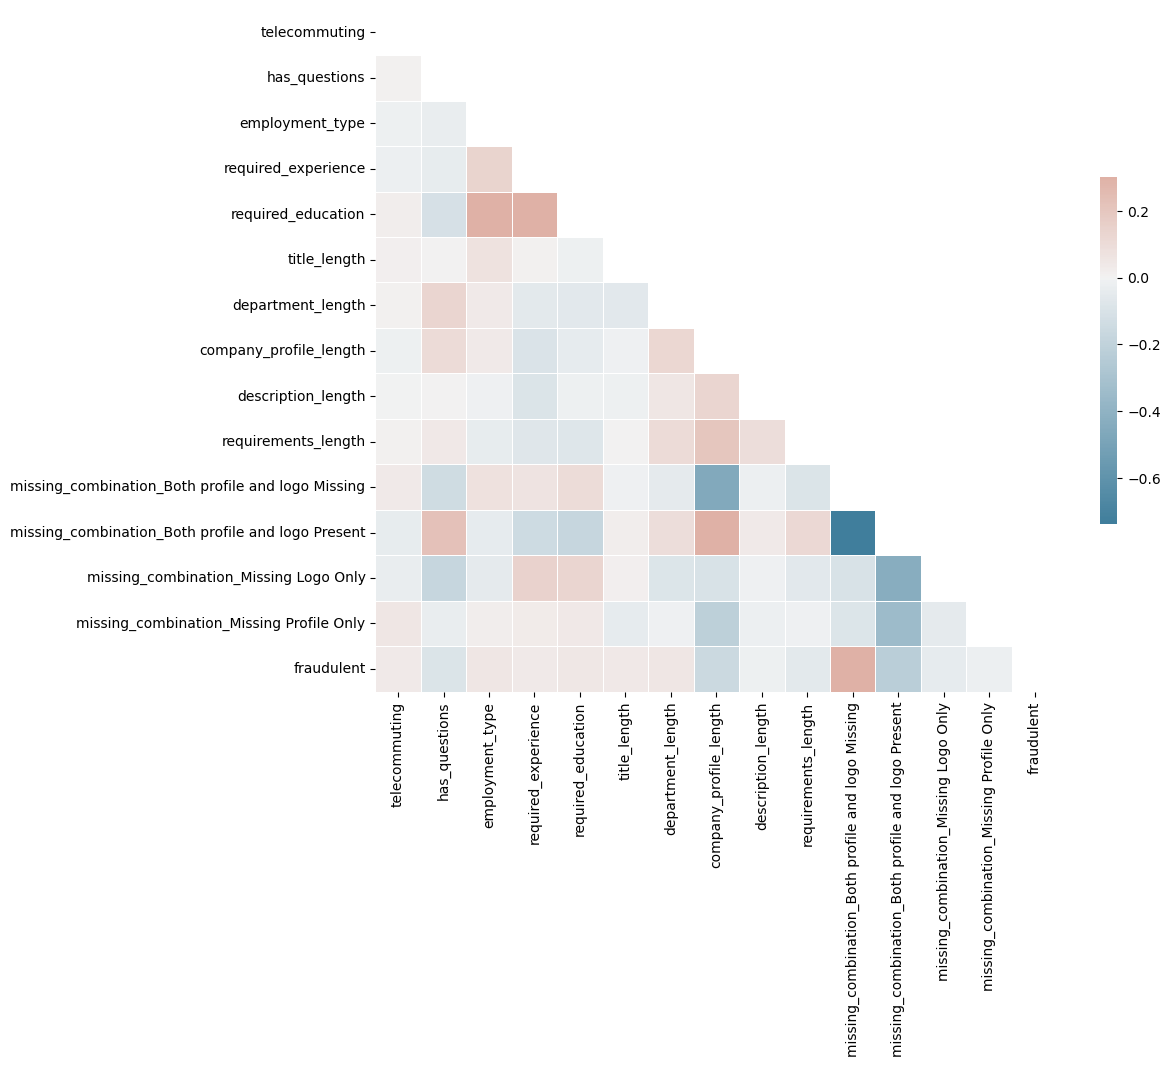

In [140]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [141]:
corr['fraudulent']

telecommuting                                        0.040077
has_questions                                       -0.090460
employment_type                                      0.051729
required_experience                                  0.034635
required_education                                   0.047503
title_length                                         0.043280
department_length                                    0.049310
company_profile_length                              -0.154782
description_length                                  -0.015832
requirements_length                                 -0.056285
missing_combination_Both profile and logo Missing    0.318668
missing_combination_Both profile and logo Present   -0.229257
missing_combination_Missing Logo Only               -0.046794
missing_combination_Missing Profile Only            -0.022035
fraudulent                                           1.000000
Name: fraudulent, dtype: float64

In [142]:
num_features = x_train.loc[:, ['telecommuting',  'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only',  'title_length',  'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.89098194e+01, 5.07669022e+01, 1.40183292e+01, 1.68014816e+01,
       6.32431901e+01, 7.85502091e+02, 1.06169872e+03, 1.57045762e+02,
       2.53657578e+01, 5.73867741e+00, 1.54857545e+02, 3.52306485e+02,
       1.53742719e+05, 1.91924303e+03, 2.49193300e+04]), array([1.37045443e-005, 1.04012980e-012, 1.81037274e-004, 4.15008877e-005,
       1.82698194e-015, 7.65955282e-173, 6.97562668e-233, 5.00207582e-036,
       4.74262319e-007, 1.65952843e-002, 1.50426636e-035, 1.33313606e-078,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))
missing_combination_Missing Profile Only              1.659528e-02
employment_type                                       1.810373e-04
required_experience                                   4.150089e-05
telecommuting                                         1.370454e-05
missing_combination_Missing Logo Only                 4.742623e-07
has_questions                                         1.040130e-12
required_education                        

<AxesSubplot:>

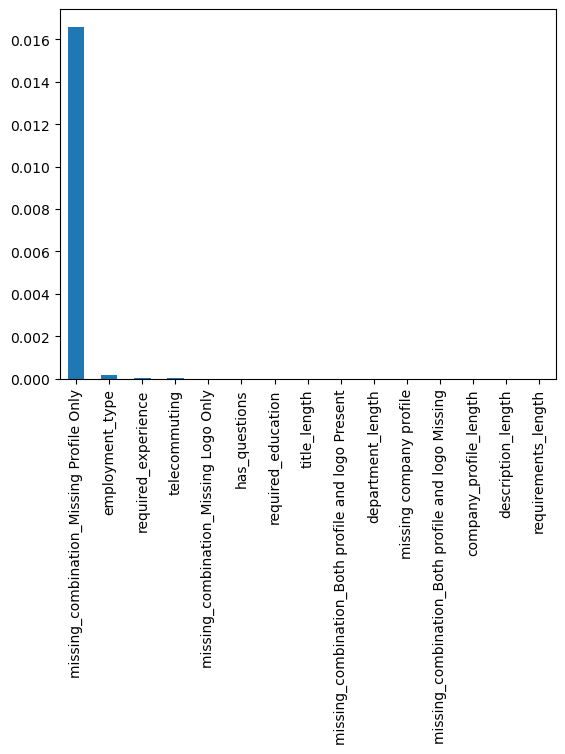

In [143]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


telecommuting                                        0.000207
has_questions                                        0.003452
employment_type                                      0.004148
required_experience                                  0.005647
required_education                                   0.008718
missing company profile                              0.030324
missing_combination_Both profile and logo Missing    0.032373
missing_combination_Both profile and logo Present    0.027727
missing_combination_Missing Logo Only                0.004029
missing_combination_Missing Profile Only             0.001845
title_length                                         0.008314
department_length                                    0.008514
company_profile_length                               0.085663
description_length                                   0.038839
requirements_length                                  0.031167
dtype: float64

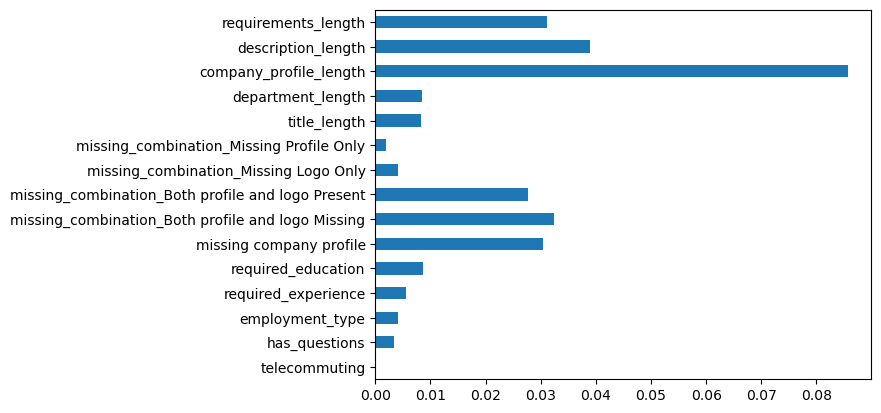

In [144]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

Sanity check for mutual info classifier after removing 'telecommuting'

In [145]:
num_features = x_train.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only',  'title_length',  'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


has_questions                                        0.004965
employment_type                                      0.001981
required_experience                                  0.003318
required_education                                   0.007097
missing company profile                              0.030230
missing_combination_Both profile and logo Missing    0.035134
missing_combination_Both profile and logo Present    0.024997
missing_combination_Missing Logo Only                0.001333
missing_combination_Missing Profile Only             0.001396
title_length                                         0.011252
department_length                                    0.004948
company_profile_length                               0.086162
description_length                                   0.038970
requirements_length                                  0.036044
dtype: float64

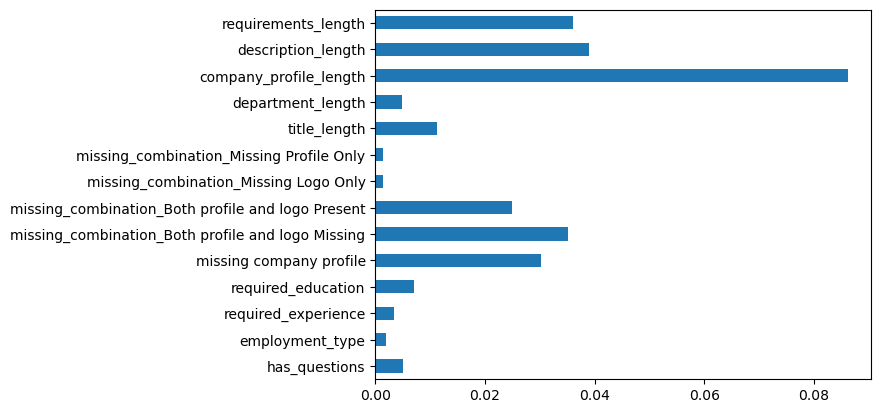

In [146]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

Therefore, we decided to remove 'location_length' as it does not provide much information gain and more importantly, based on the chi-sqaure test, it shows independency with the target variable.

From information gain, we can see that 'telecommuting' has neglegible information gain (with value of 0). Therefore, we drop telecommuting as a result. 

<b> Therefore, we decided to remove features 'telecommuting' and 'location_length' as the prior does not provide much information gain and the later, based on the chi-sqaure test, it shows independency with the target variable. In addition, our one-hot encoded column combines information from 'has_company_logo' with the presence of 'company_profile' value (the value is not null). Thus, we will not include 'has_company_logo' for our models in this section.<b>